<h1 style="font-size:260%;"><center>Exploration of data DATASUS hospital expenses from 2008/Jan until 2020/Aug.</center></h1>

# Aula 01: Aquisição e leitura de dados reais

---

## 01. Importing Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## 02. Getting the dataset

In [30]:
url = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv'

datasus_expenses = pd.read_csv(url, encoding='ISO-8859-1',
                               skiprows=3, sep=';', skipfooter=12,
                               engine='python')
# engine ='python' avoid warning message.

In [31]:
datasus_expenses.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,"30931325,46","57363420,01","51547794,07","56673338,49","48397733,07","52413429,62","56636376,98","56113054,70","55356224,30",...,"90775418,13","94908336,74","91437940,91","102876132,83","83000318,02","82381774,95","86051002,13","100531035,83","101374341,51","11958647088,33"
23,50 Mato Grosso do Sul,"5377392,11","7002472,61","8423933,19","8797487,68","9770421,80","10905392,18","10249299,82","9671553,45","10218511,05",...,"17895244,76","18115134,64","19542439,88","19032785,73","17410262,53","17913161,92","17331445,92","18755557,92","19241624,02","2172157981,36"
24,51 Mato Grosso,"4795299,01","8684882,23","7886243,14","8794109,79","9231645,40","10221763,77","9163314,28","9243148,81","9052354,89",...,"15029205,51","15249241,20","15046851,63","14886817,29","12546999,04","13604225,34","13151005,63","16371639,49","17790649,87","2036923784,59"
25,52 Goiás,"15310637,29","22258668,68","21442515,75","20921212,45","21615970,67","18270043,87","20540517,13","20650730,67","20868443,56",...,"34873099,14","35775375,69","35005746,36","34793993,14","30896577,34","34305180,56","35701473,15","39405050,36","43984702,05","4657350310,70"
26,53 Distrito Federal,"4745919,19","7632480,67","9647203,26","11098732,99","12891719,72","12850125,67","12565646,74","13710857,89","13165106,20",...,"18769437,77","22341629,09","20643441,06","22947163,99","21536505,16","19058243,91","22704335,27","25269773,34","26526196,39","2429933198,76"


In [32]:
datasus_expenses.mean()

Series([], dtype: float64)

In [33]:
datasus_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: object(154)
memory usage: 32.6+ KB


- The data type in each column is an object (not float!). That's why `datasus_expenses.mean()` does not work.

<code style="background:yellow;color:black">I can correct it with the parameters `thousands` and `decimal` in `read_csv` method.</code>

In [34]:
datasus_expenses = pd.read_csv(url, encoding='ISO-8859-1',
                               skiprows=3, sep=';', skipfooter=12,
                               engine='python', thousands='.',
                               decimal=',')

datasus_expenses.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,90775418.13,94908336.74,91437940.91,102876132.83,83000318.02,82381774.95,86051002.13,100531035.83,101374341.51,11958647088.33
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,17895244.76,18115134.64,19542439.88,19032785.73,17410262.53,17913161.92,17331445.92,18755557.92,19241624.02,2172157981.36
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,15029205.51,15249241.20,15046851.63,14886817.29,12546999.04,13604225.34,13151005.63,16371639.49,17790649.87,2036923784.59
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,34873099.14,35775375.69,35005746.36,34793993.14,30896577.34,34305180.56,35701473.15,39405050.36,43984702.05,4657350310.70
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,18769437.77,22341629.09,20643441.06,22947163.99,21536505.16,19058243.91,22704335.27,25269773.34,26526196.39,2429933198.76


In [35]:
datasus_expenses.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [36]:
datasus_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


<code style="background:yellow;color:black">Correcting the way to display high numeric values.</code>

In [37]:
pd.options.display.float_format = '{:.2f}'.format

In [38]:
datasus_expenses.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [39]:
datasus_expenses['2008/Jan']

0     1388528.39
1      902416.00
2     4735529.42
3      657889.53
4    18864744.11
5     1120973.34
6     3441592.69
7    10723506.39
8     7985142.43
9    15539821.90
10    5947814.08
11   10723002.45
12   14393949.89
13    6243726.32
14    2780750.11
15   21211522.47
16   45671659.76
17    5456723.98
18   23025258.52
19   91678473.48
20   38266347.46
21   16504913.45
22   30931325.46
23    5377392.11
24    4795299.01
25   15310637.29
26    4745919.19
Name: 2008/Jan, dtype: float64

In [40]:
datasus_expenses['2008/Ago'].mean()

27800320.306666665

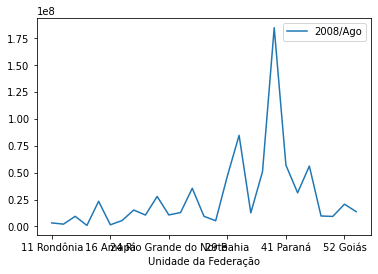

In [41]:
datasus_expenses.plot(x='Unidade da Federação',
                      y='2008/Ago')

- This graph is about the expenses in 2008/Ago for each State.
- This graph does not make sense because the line is continuous, however there is no continuous idea between the States.

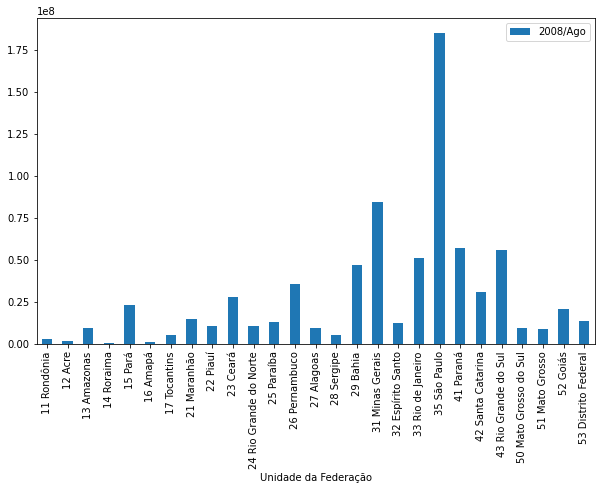

In [42]:
datasus_expenses.plot(kind='bar',
                      x='Unidade da Federação',
                      y='2008/Ago',
                      figsize=(10,6))

plt.show()

- Let's modify some more aspects to make this graph better.

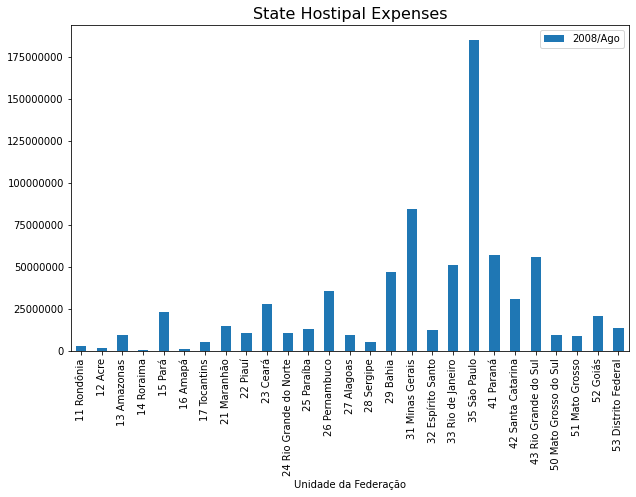

In [43]:
ax = datasus_expenses.plot(kind='bar',
                             x='Unidade da Federação',
                             y='2008/Ago',
                             figsize=(10,6))

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.title("State Hostipal Expenses", fontdict = {'fontsize' : 16})
plt.show()

- It's not easy to read the numbers in the graph above.

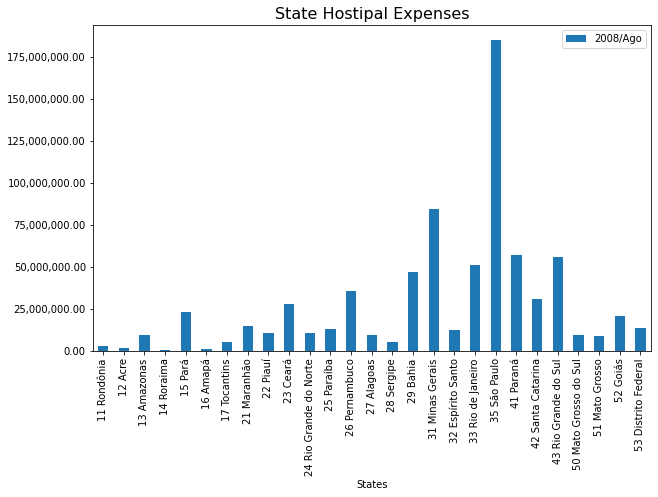

In [44]:
ax = datasus_expenses.plot(kind='bar',
                           x='Unidade da Federação',
                           y='2008/Ago',
                           figsize=(10,6))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xlabel('States')
plt.title("State Hostipal Expenses", fontdict = {'fontsize' : 16})
plt.show()

- It's easier to read the number by separating decimal places. 

### Challenge 1 and 2: Change Title and Plot the same graph for the most recent month.

Before doing the second challenge, I need to fill the '-' with 0 values (as the document on DATASUS sugests). <br>
After that, I need to convert all the columns with expenses to data type float. I noticed that the last data type of column is object.

In [45]:
datasus_expenses.iloc[0:,-2].dtype

dtype('O')

In [46]:
datasus_expenses.iloc[0:,1:] = datasus_expenses \
                                    .iloc[0:,1:] \
                                    .replace('-',0) \
                                    .astype(float)

#datasus_expenses.head()

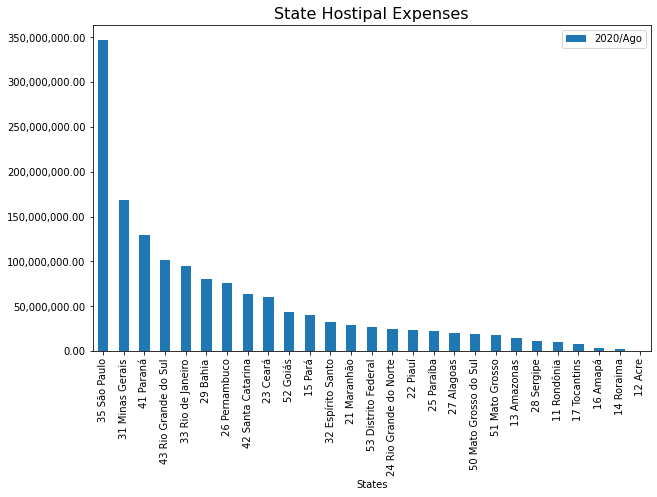

In [92]:
recent_month = datasus_expenses.columns[-2]

ax = datasus_expenses.sort_values(recent_month, ascending=False) \
                     .plot(kind='bar',
                           x='Unidade da Federação',
                           y=recent_month,
                           figsize=(10,6))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xlabel('States')
plt.title("State Hostipal Expenses", fontdict = {'fontsize' : 16})
plt.show()

# Aula 02: Primeiras Visualizações de Dados

---

[EXPLAIN THE DIFFERENCE BETWEEN THE DATASETS]

In [27]:
url_2 = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'

datasus_expenses_2 = pd.read_csv(url_2, encoding='ISO-8859-1',
                                 skiprows=3, sep=';', skipfooter=12,
                                 engine='python')

In [28]:
datasus_expenses_2.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,...,"88720873,59","97474362,62","85451646,35","84651396,59","76294596,96","86076113,42","89019478,82","78929703,81","28349257,38","11958647088,33"
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,...,"17844511,04","18653296,92","17769247,00","17357008,80","15652772,51","16703851,10","15838659,34","12508717,35","4059220,22","2172157981,36"
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,...,"13827706,20","15445693,74","14431171,87","14444207,60","11943713,53","13981483,29","14585009,42","13083151,70","6174224,99","2036923784,59"
25,52 Goiás,-,-,-,-,-,-,-,-,-,...,"34050298,55","36312121,02","34158023,81","34558308,52","27499307,93","31870107,62","34437633,20","33499284,38","20242641,73","4657348958,66"
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,...,"19207148,01","20429067,27","18219172,96","19405446,88","18123899,78","21437430,22","23479773,03","22233542,26","12044848,02","2429933198,76"
